In [0]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import math
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [0]:
# price = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Melbourne_housing_FULL.csv')
pd.set_option('display.max_columns', None)

In [0]:
obj_cats = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']

for colname in obj_cats:
    df[colname] = df[colname].astype('category') 

df['Date'] = pd.to_datetime(df['Date'])
 

In [0]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [0]:
df['Regionname'] = df['Regionname'].map({'Northern Metropolitan':'N Metro',
                                            'Western Metropolitan':'W Metro', 
                                            'Southern Metropolitan':'S Metro', 
                                            'Eastern Metropolitan':'E Metro', 
                                            'South-Eastern Metropolitan':'SE Metro', 
                                            'Northern Victoria':'N Vic',
                                            'Eastern Victoria':'E Vic',
                                            'Western Victoria':'W Vic'})

In [0]:
df.shape

(34857, 21)

In [0]:
df['area'] = df.Address.str.split(' ').str[1]
df.drop(['Lattitude','Longtitude','Postcode','Address','Postcode'],inplace=True,axis=1)

In [0]:
df.head(2)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount,area
0,Abbotsford,2,h,NaN,SS,Jellis,2016-03-09,2.5,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,N Metro,4019.0,Studley
1,Abbotsford,2,h,1480000.0,S,Biggin,2016-03-12,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,N Metro,4019.0,Turner


In [0]:
# Suburb -> area -> SellerG -> Method -> Type -> Rooms = Price

In [0]:
df.isna().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Regionname           3
Propertycount        3
area                 0
dtype: int64

In [0]:
df.dropna(subset=['Price','Bedroom2','Bathroom','Car','Landsize','YearBuilt'],how='all',inplace=True)

In [0]:
df.isna().sum()

Suburb               0
Rooms                0
Type                 0
Price             5835
Method               0
SellerG              0
Date                 0
Distance             1
Bedroom2          6442
Bathroom          6451
Car               6953
Landsize         10035
BuildingArea     19340
YearBuilt        17531
CouncilArea          3
Regionname           3
Propertycount        3
area                 0
dtype: int64

In [0]:
# df["Bedroom2"] = df["Bedroom2"].astype(int)
# df["Bathroom"] = df["Bathroom"].astype(int)
# df["Car"] = df["Car"].astype(int)
# df["Landsize"] = df["Landsize"].astype(int)
# df["Propertycount"] = df["Propertycount"].astype(int)
df.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Propertycount'],
      dtype='object')

Text(0.5, 1, 'Variable Correlation')

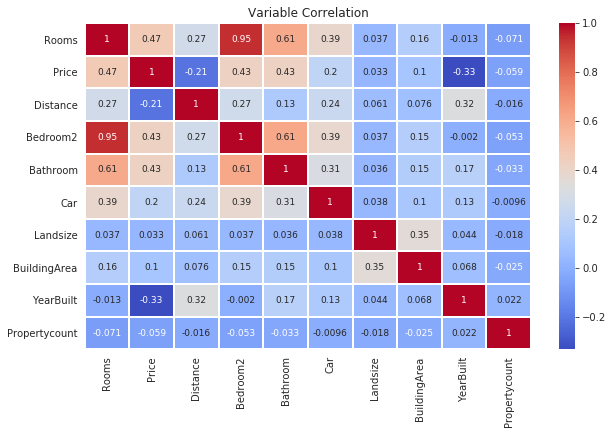

In [0]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

In [0]:
# Split
# Create features variable 
X =ddf[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
            'BuildingArea', 'Propertycount']]

# Create target variable
y = ddf['Price']

In [0]:
# Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

In [0]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression

# Create linear regression object
regressor = LinearRegression()

# Fit model to training data
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = regressor.predict(X_test)

In [0]:
ddf = df.copy()
ddf.dropna(inplace=True,axis=0)

In [0]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 348433.6251236796
MSE: 268593933335.54898
RMSE: 518260.4879165968


In [0]:
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.40518530432601585


In [0]:
cdf = pd.DataFrame(data = regressor.coef_, index = X.columns, columns = ['Coefficients'])
cdf

,Coefficients
Rooms,185220.636396
Distance,-39117.146365
Bathroom,137060.864360
Car,38071.830728
Landsize,30.799630
BuildingArea,2569.932550
Propertycount,-1.125835


Rooms is associated with an increase in Price by $136,531.55

Distance is associated with a decrease in Price by $32,160.84

Bathroom is associated with an increase in Price by $236,639.21

Car space is associated with an increase in Price by $59,122.83

Landsize is associated with an increase in Price by $35.75

BuildingArea is associated with an increase in Price by $26,65.10

Propertycount is associated with a decrease in Price by $0.05

Age is associated with an increase in Price by $4,729.73

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# scale X_train values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.transform(X_test.astype(np.float64))

In [0]:
RF = RandomForestRegressor(n_estimators=10)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

print('Random Forest Regressor')
print('\nR-squared training set:')
print(RF.score(X_train, y_train))

print('\nR-squared test set:')
print(RF.score(X_test, y_test))

Random Forest Regressor

R-squared training set:
0.9455356368638957

R-squared test set:
0.702887042485798
